# 1. Original version: doesn't find the lowest cost
# => 因為是先以最lowest cost來排序，然後繼續run
# => 但有可能    其他次小cost的path   的最終結果(total cost)會更小
# => 如下圖的 (i): (a)14 + (b)5 = 19    &  (ii): (c)15 + (d)2 = 17

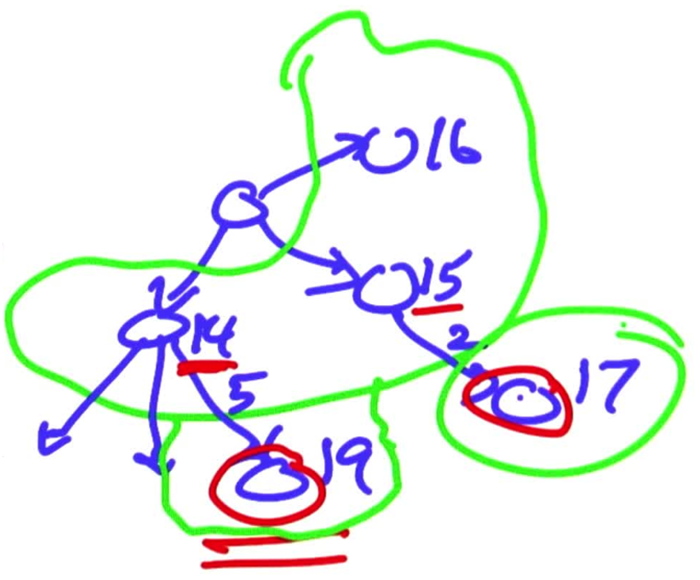

In [1]:
from IPython.display import Image

Image("Desktop\Reason.png")

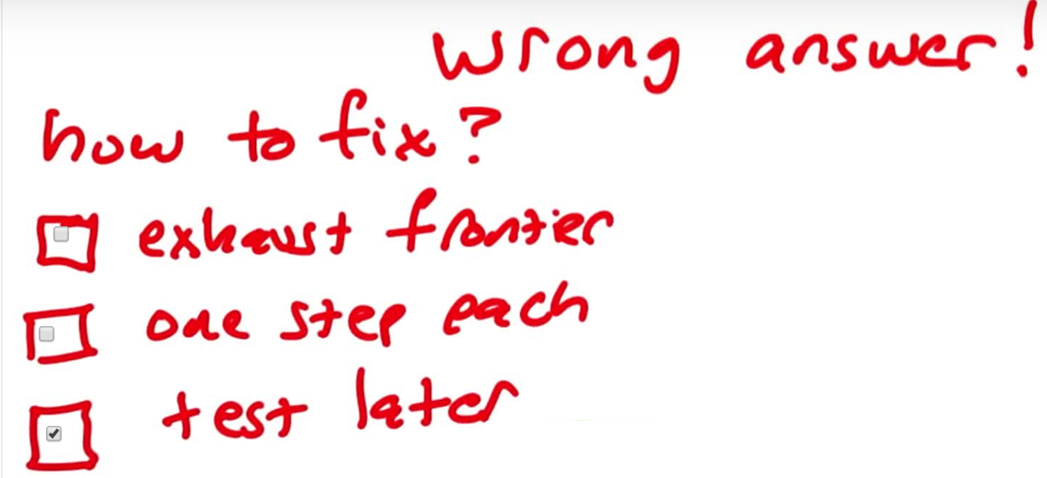

In [2]:
from IPython.display import Image

Image("Desktop\How.png")

# (1) Code

In [3]:
def bsuccessors(state):
    """Return a dict of {state:action} pairs.  A state is a (here, there, t) tuple, where here and there are frozensets of 
    people (indicated by their times) and/or the light, and t is a number indicating the elapsed time."""
    
    here, there, t = state
    
    if 'light' in here:
        
        return dict(((here  - frozenset([a,b, 'light']),
                      there | frozenset([a, b, 'light']),
                      t + max(a, b)),
                     (a, b, '->'))
                    for a in here if a is not 'light'
                    for b in here if b is not 'light')
    
    else:
        
        return dict(((here  | frozenset([a,b, 'light']),
                      there - frozenset([a, b, 'light']),
                      t + max(a, b)),
                     (a, b, '<-'))
                    for a in there if a is not 'light'
                    for b in there if b is not 'light')  
        
def elapsed_time(path):
    
    return path[-1][2]

def bridge_problem(here):

    here = frozenset(here) | frozenset(['light'])
    
    explored = set() # set of states we have visited
    
    # State will be a (people-here, people-there, time-elapsed)
    frontier = [ [(here, frozenset(), 0)] ] # ordered list of paths we have blazed
    
    if not here:
        
        return frontier[0]
    
    while frontier:
        
        path = frontier.pop(0)
        
        for (state, action) in bsuccessors(path[-1]).items():
            
            if state not in explored:
                
                here, there, t = state
                
                explored.add(state)
                
                path2 = path + [action, state]
                
                if not here:  ## That is, nobody left here
                    
                    return path2
                
                else:
                    
                    frontier.append(path2)
                    
                    frontier.sort(key=elapsed_time)
                    
    return []

print (bridge_problem(frozenset((1, 2),))[-1][-1] == 2)               # the [-1][-1] grabs the total elapsed time
print (bridge_problem(frozenset((1, 2, 5, 10),))[-1][-1] == 19)


True
True


# (2) Description => 以bridge_problem(frozenset((1, 2, 5)))為例

In [ ]:
(1) here = frozenset({1, 2, 5, 'light'})

(2) there = frozenset()

(3) frontier = [ [(here, frozenset(), 0)] ]

(4) path = frontier.pop(0) = 
[(frozenset({1, 2, 'light', 5}), frozenset(), 0)]

(5) bsuccessors(path[-1]) => 

=> return 
d = {(frozenset({2, 5}), frozenset({1, 'light'}),    1): (1, 1, '->'), 
    (frozenset({5}),     frozenset({1, 2, 'light'}), 2): (2, 1, '->'), 
    (frozenset({2}),     frozenset({1, 5, 'light'}), 5): (5, 1, '->'), 
    (frozenset({1, 5}),  frozenset({2, 'light'}),    2): (2, 2, '->'), 
    (frozenset({1}),     frozenset({2, 5, 'light'}), 5): (5, 2, '->'), 
    (frozenset({1, 2}),  frozenset({5, 'light'}),    5): (5, 5, '->')}
    
(6) frontier.sort(key=elapsed_time) => 

[[(frozenset({1, 2, 5, 'light'}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({1, 'light'}), 1)], 
 [(frozenset({1, 2, 5, 'light'}), frozenset(), 0), (2, 1, '->'), (frozenset({5}), frozenset({1, 2, 'light'}), 2)], 
 [(frozenset({1, 2, 5, 'light'}), frozenset(), 0), (2, 2, '->'), (frozenset({1, 5}), frozenset({2, 'light'}), 2)], 
 [(frozenset({1, 2, 5, 'light'}), frozenset(), 0), (5, 1, '->'), (frozenset({2}), frozenset({1, 5, 'light'}), 5)], 
 [(frozenset({1, 2, 5, 'light'}), frozenset(), 0), (5, 2, '->'), (frozenset({1}), frozenset({2, 5, 'light'}), 5)], 
 [(frozenset({1, 2, 5, 'light'}), frozenset(), 0), (5, 5, '->'), (frozenset({1, 2}), frozenset({5, 'light'}), 5)]]
 
(7) path = frontier.pop(0) = 
[(frozenset({1, 2, 5, 'light'}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({1, 'light'}), 1)]

(8) bsuccessors(path[-1]) => 

=> return 
d = {(frozenset({'light', 1, 2, 5}), frozenset(), 2): (1, 1, '<-')}

(9) frontier.sort(key=elapsed_time) =>

[[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (2, 1, '->'), (frozenset({5}), frozenset({'light', 1, 2}), 2)], 
[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (2, 2, '->'), (frozenset({1, 5}), frozenset({'light', 2}), 2)],
[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 1), (1, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 2)]
[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (5, 1, '->'), (frozenset({2}), frozenset({'light', 1, 5}), 5)], 
[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (5, 2, '->'), (frozenset({1}), frozenset({'light', 2, 5}), 5)], 
[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (5, 5, '->'), (frozenset({1, 2}), frozenset({'light', 5}), 5)]]

(10) continue above steps until the last frontier => 

[[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (2, 1, '->'), (frozenset({5}), frozenset({'light', 1, 2}), 2), (1, 1, '<-'), (frozenset({'light', 1, 5}), frozenset({2}), 3)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 1), (1, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 2), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 3)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (2, 1, '->'), (frozenset({5}), frozenset({'light', 1, 2}), 2), (2, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 4)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (2, 1, '->'), (frozenset({5}), frozenset({'light', 1, 2}), 2), (2, 2, '<-'), (frozenset({'light', 2, 5}), frozenset({1}), 4)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 1), (1, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 2), (2, 1, '->'), (frozenset({5}), frozenset({'light', 1, 2}), 4)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 1), (1, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 2), (2, 2, '->'), (frozenset({1, 5}), frozenset({'light', 2}), 4)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (5, 1, '->'), (frozenset({2}), frozenset({'light', 1, 5}), 5)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (5, 2, '->'), (frozenset({1}), frozenset({'light', 2, 5}), 5)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (5, 5, '->'), (frozenset({1, 2}), frozenset({'light', 5}), 5)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 1), (1, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 2), (5, 1, '->'), (frozenset({2}), frozenset({'light', 1, 5}), 7)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 1), (1, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 2), (5, 2, '->'), (frozenset({1}), frozenset({'light', 2, 5}), 7)], 
 [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (1, 1, '->'), (frozenset({2, 5}), frozenset({'light', 1}), 1), (1, 1, '<-'), (frozenset({'light', 1, 2, 5}), frozenset(), 2), (5, 5, '->'), (frozenset({1, 2}), frozenset({'light', 5}), 7)]]
 
(11) path = frontier.pop(0) = 
[(frozenset({'light', 1, 2, 5}), frozenset(), 0), (2, 1, '->'), (frozenset({5}), frozenset({'light', 1, 2}), 2), (1, 1, '<-'), (frozenset({'light', 1, 5}), frozenset({2}), 3)]

(12) bsuccessors(path[-1]) => 

=> return 
d = {(frozenset({5}), frozenset({'light', 2, 1}), 4): (1, 1, '->'), (frozenset(), frozenset({'light', 2, 5, 1}), 8): (5, 1, '->'), (frozenset({1}), frozenset({'light', 2, 5}), 8): (5, 5, '->')}

(13) (12)的d的第二項已經讓all people到there => complete

total path = [(frozenset({'light', 1, 2, 5}), frozenset(), 0), (2, 1, '->'), (frozenset({5}), frozenset({'light', 1, 2}), 2), (1, 1, '<-'), (frozenset({'light', 1, 5}), frozenset({2}), 3), (5, 1, '->'), (frozenset(), frozenset({'light', 1, 2, 5}), 8)]
total time = 8


# 2. Intermediate version: find the correct answer, but it's not efficient

# (1) Code

In [1]:
def bsuccessors(state):
    """Return a dict of {state:action} pairs.  A state is a (here, there, t) tuple, where here and there are frozensets of 
    people (indicated by their times) and/or the light, and t is a number indicating the elapsed time."""
    
    here, there, t = state
    
    if 'light' in here:
        
        return dict(((here  - frozenset([a,b, 'light']),
                      there | frozenset([a, b, 'light']),
                      t + max(a, b)),
                     (a, b, '->'))
                    for a in here if a is not 'light'
                    for b in here if b is not 'light')
    
    else:
        
        return dict(((here  | frozenset([a,b, 'light']),
                      there - frozenset([a, b, 'light']),
                      t + max(a, b)),
                     (a, b, '<-'))
                    for a in there if a is not 'light'
                    for b in there if b is not 'light')  
        
def elapsed_time(path):
    
    return path[-1][2]

def bridge_problem(here):
    "Find the fastest (least elapsed time) path to the goal in the bridge problem."
    
    here = frozenset(here) | frozenset(['light'])
    
    explored = set() # set of states we have visited
    
    # State will be a (peoplelight_here, peoplelight_there, time_elapsed)
    # E.g. ({1, 2, 5, 10, 'light'}, {}, 0)
    
    frontier = [ [(here, frozenset(), 0)] ] # ordered list of paths we have blazed
    
    while frontier:
        
        path = frontier.pop(0)
        
        here1, there1, t1 = state1 = path[-1]
        
        if not here1:  ## Check for solution when we pull best path off frontier
            
            return path
        
        for (state, action) in bsuccessors(state1).items():
            
            if state not in explored:
                
                here, there, t = state
                
                explored.add(state)
                
                path2 = path + [action, state]
                
                # Don't check for solution when we extend a path
                frontier.append(path2)
                frontier.sort(key=elapsed_time)
                
    return []

def path_states(path):
    "Return a list of states in this path."
    return path[0::2]
    
def path_actions(path):
    "Return a list of actions in this path."
    return path[1::2]


print (elapsed_time(bridge_problem([1,2,5,10])) == 17)
# >>> 17

%timeit elapsed_time(bridge_problem([1,1000]))     # inefficient

## There are two equally good solutions
#S1 = [(2, 1, '->'), (1, 1, '<-'), (5, 10, '->'), (2, 2, '<-'), (2, 1, '->')]
#S2 = [(2, 1, '->'), (2, 2, '<-'), (5, 10, '->'), (1, 1, '<-'), (2, 1, '->')]
#path_actions(bridge_problem([1,2,5,10])) in (S1, S2)
# >>> True

## Try some other problems
#path_actions(bridge_problem([1,2,5,10,15,20]))
# >>> [(2, 1, '->'), (1, 1, '<-'), (10, 5, '->'), (2, 2, '<-'), (2, 1, '->'), (1, 1, '<-'), (15, 20, '->'), (2, 2, '<-'), (2, 1, '->')]

#path_actions(bridge_problem([1,2,4,8,16,32]))
# >>> [(2, 1, '->'), (1, 1, '<-'), (8, 4, '->'), (2, 2, '<-'), (1, 2, '->'), (1, 1, '<-'), (16, 32, '->'), (2, 2, '<-'), (2, 1, '->')]

#[elapsed_time(bridge_problem([1,2,4,8,16][:N])) for N in range(6)]
# >>> [0, 1, 2, 7, 15, 28]

#[elapsed_time(bridge_problem([1,1,2,3,5,8,13,21][:N])) for N in range(8)]
# >>> [0, 1, 1, 2, 6, 12, 19, 30]


True
271 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# (2) Description => 以bridge_problem(frozenset((1, 2)))為例

In [ ]:
(1) 大部分都和original version相同，except 判定式 (判定 是否為答案)

(2) original的判定式是在for loop裡，intermediate的判定式是在for loop外 => 如圖上

    (i) 所以在original中，只要一有符合的答案(not here) => 程式就complete => 那就會有探索不完全的問題
    
    (ii) 在intermediate中，是會先run完一組path的接下來所有可能性(bsuccessors(path[-1])) => 放入新的frontier => complete for loop 
    => 由新的一run探索，如果碰到答案，程式才complete => 如圖下


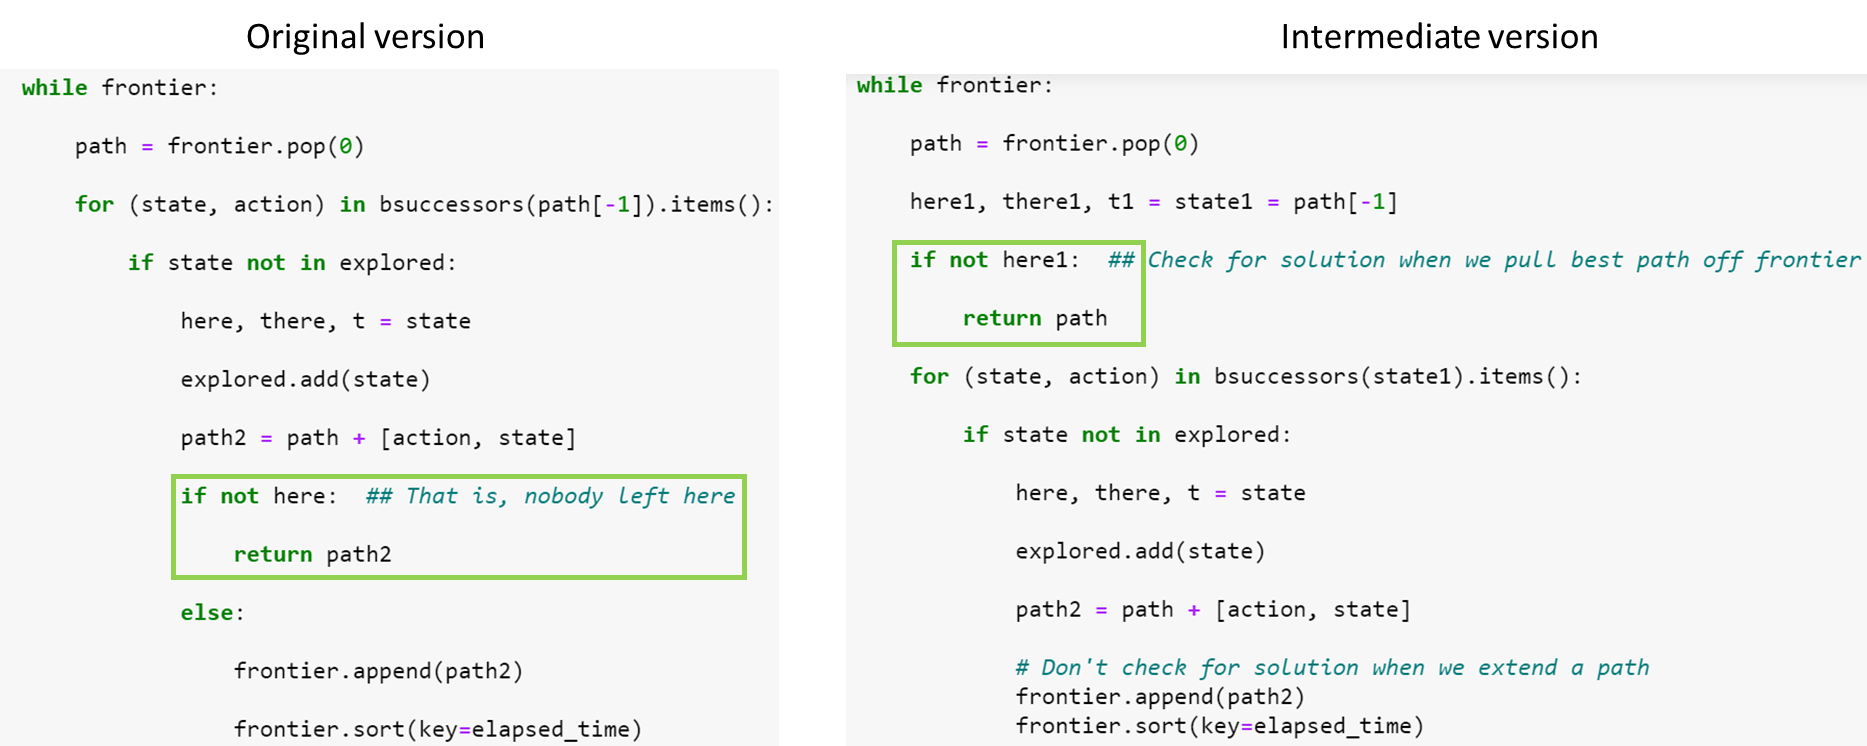

In [15]:
from IPython.display import Image

Image("Desktop\Difference.png")

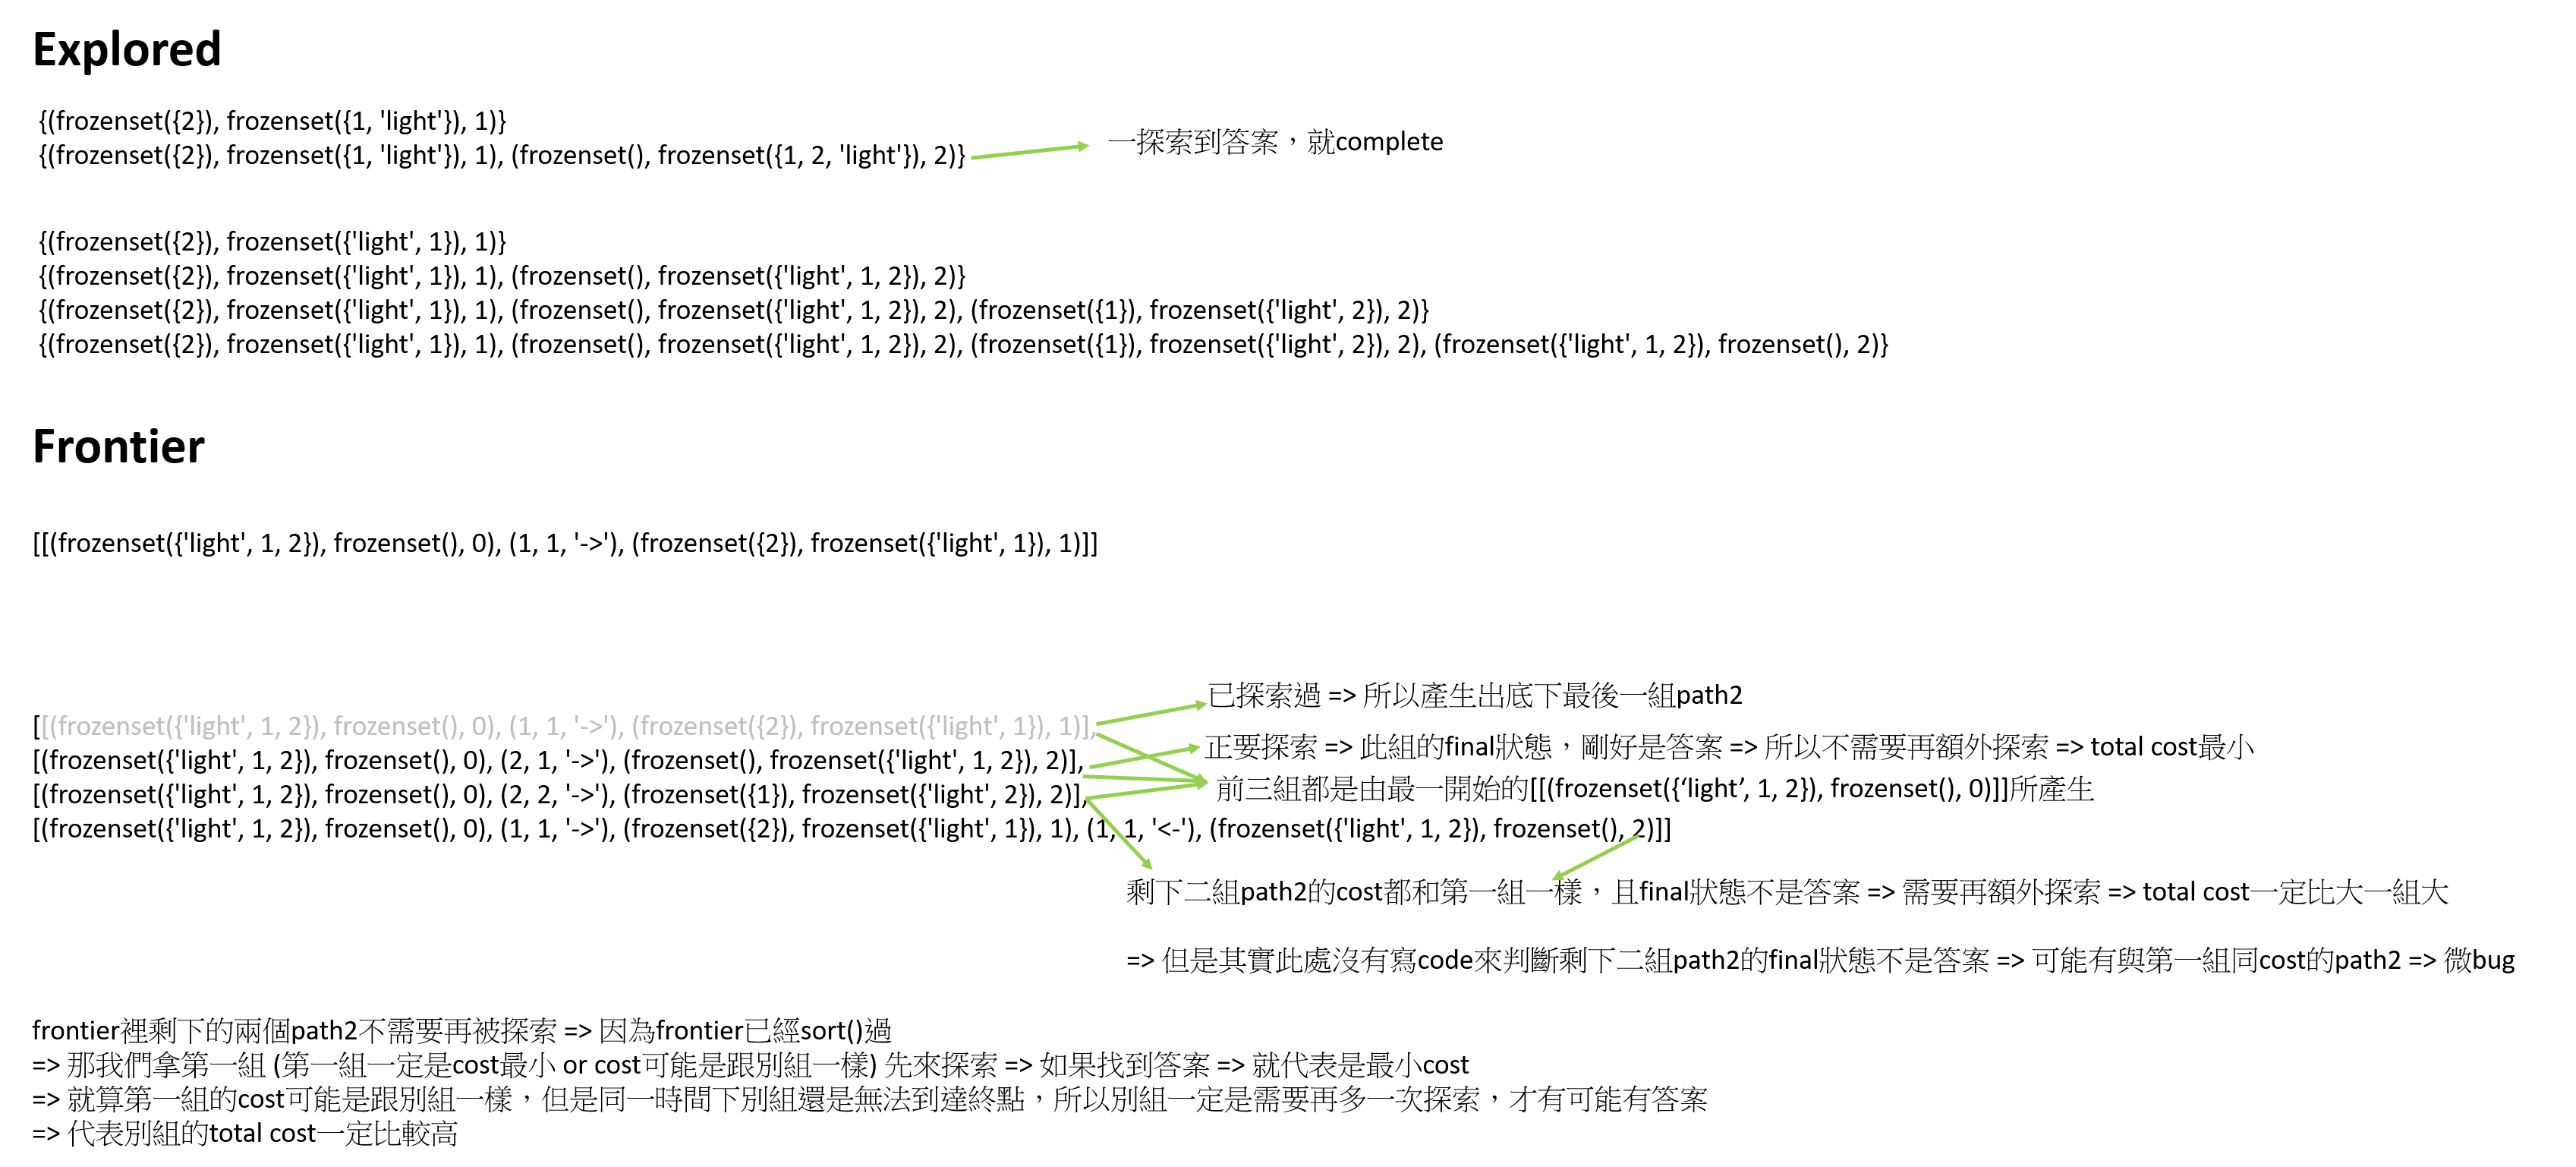

In [1]:
from IPython.display import Image

Image("Desktop\Difference_2.png")

# 3. Refactoring version: efficient

# 因為就算是繞圈 => loop => 但是t不同，所以都會被判定成不同states， 如圖
# => person 1 來來回回  來往here & there，但是t不同，所以都被探定不同states
# => 但實際上就是一個loop，但每個state都要探索 => inefficient，且浪費resources

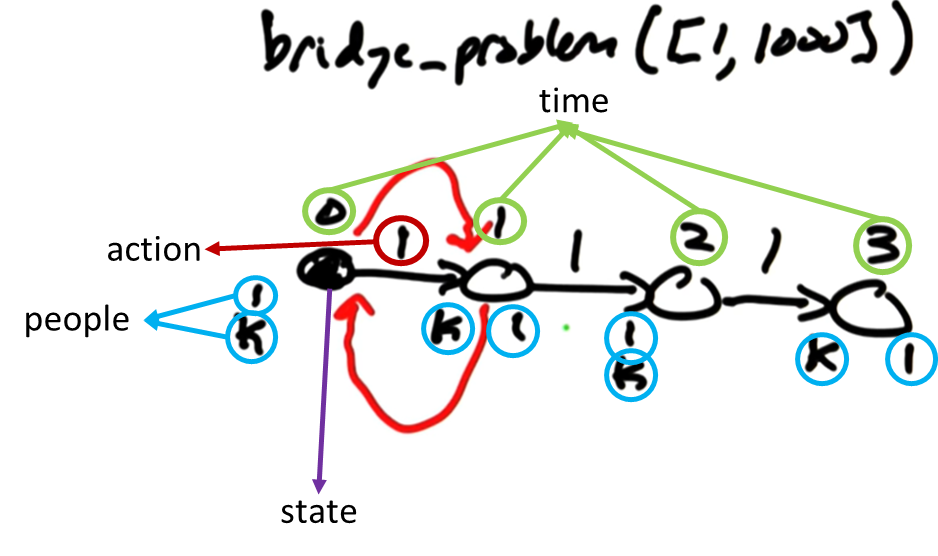

In [17]:
from IPython.display import Image

Image("Desktop\Issue.png")

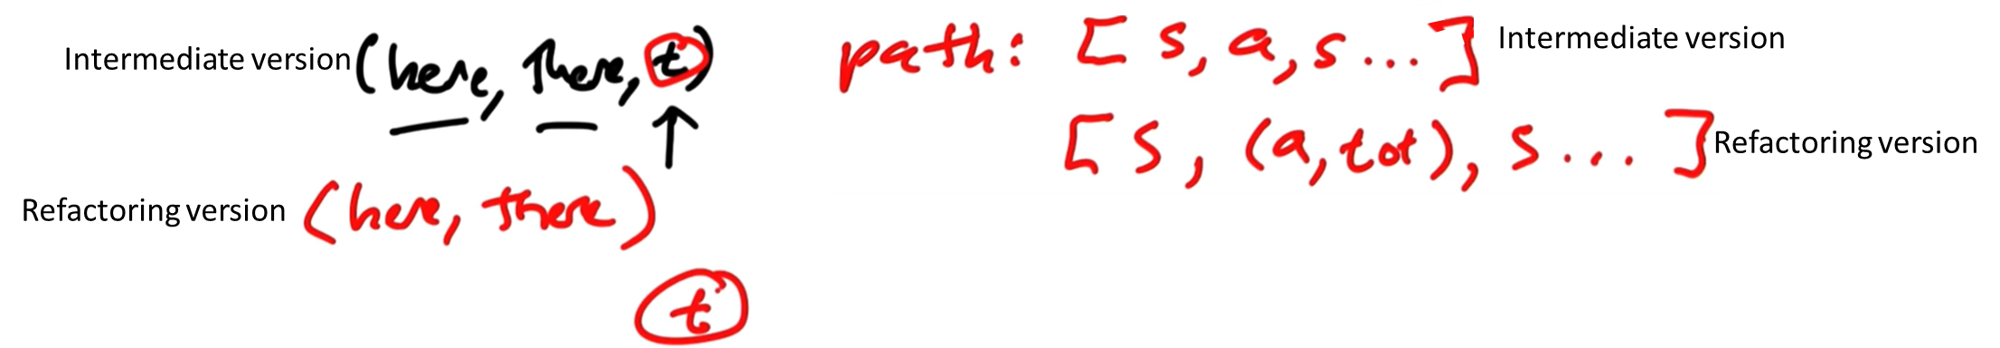

In [18]:
from IPython.display import Image

Image("Desktop\How_1.png")

=> 所以把t提出來成額外parameter
=> 讓t & action成為一個tuple

# (1) Code

In [2]:
"""We represent our starting state as frozensets of people (indicated with the time they need to cross the bridge) on one side 
   of the river('here'), plus the light they need to carry when crossing. The goal is to get all people to the other side, that 
   is, no one remaining in 'here', in the shortest time possible."""

def bsuccessors2(state):
    """Return a dict of {state:action} pairs.  A state is a (here, there) tuple, where here and there are frozensets of people 
    (indicated by their times) and/or the light."""
    
    here, there = state
    
    if 'light' in here:
        
        return dict(((here  - frozenset([a, b, 'light']),
                      there | frozenset([a, b, 'light'])),
                     (a, b, '->'))
                    for a in here if a is not 'light'
                    for b in here if b is not 'light')
    
    else:
        
        return dict(((here  | frozenset([a, b, 'light']),
                      there - frozenset([a, b, 'light'])),
                     (a, b, '<-'))
                    for a in there if a is not 'light'
                    for b in there if b is not 'light')

def bridge_problem2(here):
    "Find the fastest (least path cost) path to the goal in the bridge problem."
    
    here = frozenset(here) | frozenset(['light'])
    
    explored = set() # set of states we have visited
    
    # State will be a (people_here, people_there)，E.g. ({1, 2, 5, 10, 'light'}, {})
    
    frontier = [ [(here, frozenset())] ] # ordered list of paths we have blazed
    
    while frontier:
        
        path = frontier.pop(0)
        
        here1, there1 = state1 = final_state(path)
        
        if not here1:
            
            return path
        
        explored.add(state1)
        
        pcost = path_cost(path)
        
        for (state, action) in bsuccessors2(state1).items():
            
            if state not in explored:
                
                total_cost = pcost + bcost(action)
                
                path2 = path + [(action, total_cost), state]
                
                add_to_frontier(frontier, path2)
                
    return []

def final_state(path):
    
    return path[-1]

def elapsed_time(path):
    
    return path[-2][-1]

def path_cost(path):
    """The total cost of a path (which is stored in a tuple with the final action."""
    
    # path = [state, (action, total_cost), state, ... ]
    
    if len(path) < 3:
        
        return 0
    
    else:
        
        action, total_cost = path[-2]
        return total_cost

def bcost(action):
    
    """Returns the cost (a number) of an action in the bridge problem."""
    
    # An action is an (a, b, arrow) tuple; a and b are times; arrow is a string.
    
    a, b, arrow = action
    
    return max(a, b)

def add_to_frontier(frontier, path):
    
    "Add path to frontier, replacing costlier path if there is one."
    
    # (This could be done more efficiently) Find if there is an old path to the final state of this path.
    
    old = None
    
    for i, p in enumerate(frontier):
        
        if final_state(p) == final_state(path):
            
            old = i
            
            break
            
    if old is not None and path_cost(frontier[old]) < path_cost(path):
        
        return # Old path was better; do nothing
    
    elif old is not None:
        
        del frontier[old] # Old path was worse; delete it
        
    ## Now add the new path and re-sort
    
    frontier.append(path)
    frontier.sort(key = path_cost)

print (elapsed_time(bridge_problem2([1,2,5,10])))

%timeit elapsed_time(bridge_problem2([1,1000])) # vert efficient compared to intermediate version


17
38.3 µs ± 866 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# (2) Description => 以frozenset((1, 2))為例

In [ ]:
(1) intermediate的bsuccessors & refactoring的bsuccessors2差別只有: bsuccessors2不包含t這個時間parameter
    
(2) intermediate & refactoring 的 elapsed_time 只差在取值位子不同
=> 因為refactoring改變表達方式: [state,(action, total time), state...........]
    
(3) intermediate的bridge_problem & refactoring的bridge_problem2:
    
    (i) explored
    
        (a) bridge_problem的explored會記錄all經過bsuccessors(path[-1]).items()的states
        
        {(frozenset({2}), frozenset({'light', 1}), 1)}    # 將(frozenset({1, 2, 'light'}), frozenset())代入bsuccessors(path[-1]).items()所得到的states
        {(frozenset({2}), frozenset({'light', 1}), 1), (frozenset(), frozenset({'light', 1, 2}), 2)}
        {(frozenset({2}), frozenset({'light', 1}), 1), (frozenset(), frozenset({'light', 1, 2}), 2), (frozenset({1}), frozenset({'light', 2}), 2)}
        {(frozenset({2}), frozenset({'light', 1}), 1), (frozenset(), frozenset({'light', 1, 2}), 2), (frozenset({1}), frozenset({'light', 2}), 2), (frozenset({'light', 1, 2}), frozenset(), 2),}

        (b) bridge_problem2的explored只記錄最一開始的state
        
        {(frozenset({1, 2, 'light'}), frozenset())}      # 最一開始的state
        {(frozenset({1, 2, 'light'}), frozenset()), (frozenset({2}), frozenset({1, 'light'}))}

    (ii) refactoring的final_state就是尋找path[-1] => 和intermediate的相同，只是refactoring的獨立成一個function
    
    (iii) refactoring會尋找pcost，也就是t
    => 用path_cost來尋找
    => 如果len(path) < 3，代表是最一開始的state => pcost == 0
    => otherwise, return path[-2][-1]

    => Ex: [(frozenset({1, 2, 'light'}), frozenset()), ((1, 1, '->'), 1), (frozenset({2}), frozenset({1, 'light'}))]
    => pcost = 1
    
    => pcost就是既有的cost
    
    (iv) for loop中
    
        (a) 因為refactoring的explored只記錄最一開始的state
        => Ex: {(frozenset({1, 2, 'light'}), frozenset())}
        => 所以當碰到 [(frozenset({1, 2, 'light'}), frozenset()), ((1, 1, '->'),1), (frozenset({2}), frozenset({1, 'light'})), ((1, 1, '<-'),2), (frozenset({1, 2, 'light'}), frozenset())]
        => 也就是person1 來來回回 來往here & there，但是t不同，intermediate都被判定成不同states時
        => 因為line 38的[-1] == (frozenset({1, 2, 'light'}), frozenset())
        => 已經存在explored中，所以會被if statement直接刪除，不會再被加入frontier
        => 解決intermediate的inefficient問題
  
        (b) total_cost = pcost + bcost(action)
        => bcost(action): a, b, arrow = action    return max(a, b)
        
        => bcost也就是現在做此action所需的cost
        => Ex: action == (2, 1, '->') => bcost == 2
        
        (c) path2 = path + [(action, total_cost), state]
        => 符合改變後的表達方式
        
        (d) 將path2加入frontier將由add_to_frontier(frontier, path2)處理
        
        => 可以比較新舊path (在final state相同情況下)
        
        => 舊path好 => 新path不加入frontier
        => 新path好 => delete舊path => 新path加入frontier
        
            (da) 舊path好 => 新path不加入frontier
            => 以frozenset((1, 2, 5))為例
            
                (daa) frontier:
                [[(frozenset({1, 2, 5, 'light'}), frozenset()), ((2, 1, '->'), 2), (frozenset({5}), frozenset({1, 2, 'light'})), ((2, 2, '<-'), 4), (frozenset({2, 5, 'light'}), frozenset({1}))], 
                 [(frozenset({1, 2, 5, 'light'}), frozenset()), ((5, 1, '->'), 5), (frozenset({2}), frozenset({1, 5, 'light'}))], 
                 [(frozenset({1, 2, 5, 'light'}), frozenset()), ((5, 2, '->'), 5), (frozenset({1}), frozenset({2, 5, 'light'}))], 
                 [(frozenset({1, 2, 5, 'light'}), frozenset()), ((5, 5, '->'), 5), (frozenset({1, 2}), frozenset({5, 'light'}))], 
                 [(frozenset({1, 2, 5, 'light'}), frozenset()), ((2, 1, '->'), 2), (frozenset({5}), frozenset({1, 2, 'light'})), ((1, 1, '<-'), 3), (frozenset({1, 5, 'light'}), frozenset({2})), ((5, 1, '->'), 8), (frozenset(), frozenset({1, 2, 5, 'light'}))]]

                (dab) path:
                [(frozenset({1, 2, 5, 'light'}), frozenset()), ((2, 1, '->'), 2), (frozenset({5}), frozenset({1, 2, 'light'})), ((1, 1, '<-'), 3), (frozenset({1, 5, 'light'}), frozenset({2})), ((5, 5, '->'), 8), (frozenset({1}), frozenset({2, 5, 'light'}))]
            
            => old: line 66的final state是(frozenset({1}), frozenset({2, 5, 'light'})) => path_cost == 5
            => new: linw 71的final state是(frozenset({1}), frozenset({2, 5, 'light'})) => path_cost == 8
            => old較new好
            => 新path不加入frontier
            
            (db) 新path好 => delete舊path => 新path加入frontier
            => 以frozenset((1, 2, 5, 10))為例
            
                (dba) frontier:
                [[(frozenset({1, 2, 5, 'light', 10}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({'light', 1, 2})), ((1, 1, '<-'), 3), (frozenset({'light', 10, 5, 1}), frozenset({2})), ((1, 5, '->'), 8), (frozenset({10}), frozenset({'light', 2, 5, 1})), ((5, 5, '<-'), 13), (frozenset({'light', 10, 5}), frozenset({1, 2}))], 
                 [(frozenset({1, 2, 5, 'light', 10}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({'light', 1, 2})), ((2, 2, '<-'), 4), (frozenset({'light', 10, 2, 5}), frozenset({1})), ((5, 10, '->'), 14), (frozenset({2}), frozenset({'light', 1, 10, 5}))], 
                 [(frozenset({1, 2, 5, 'light', 10}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({'light', 1, 2})), ((1, 1, '<-'), 3), (frozenset({'light', 10, 5, 1}), frozenset({2})), ((5, 10, '->'), 13), (frozenset({1}), frozenset({'light', 2, 10, 5})), ((2, 2, '<-'), 15), (frozenset({'light', 1, 2}), frozenset({10, 5}))], 
                 [(frozenset({1, 2, 5, 'light', 10}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({'light', 1, 2})), ((1, 1, '<-'), 3), (frozenset({'light', 10, 5, 1}), frozenset({2})), ((1, 10, '->'), 13), (frozenset({5}), frozenset({'light', 2, 10, 1})), ((2, 2, '<-'), 15), (frozenset({'light', 2, 5}), frozenset({1, 10}))], 
                 [(frozenset({1, 2, 5, 'light', 10}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({'light', 1, 2})), ((1, 1, '<-'), 3), (frozenset({'light', 10, 5, 1}), frozenset({2})), ((5, 10, '->'), 13), (frozenset({1}), frozenset({'light', 2, 10, 5})), ((5, 5, '<-'), 18), (frozenset({'light', 1, 5}), frozenset({2, 10}))], 
                 [(frozenset({1, 2, 5, 'light', 10}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({'light', 1, 2})), ((1, 1, '<-'), 3), (frozenset({'light', 10, 5, 1}), frozenset({2})), ((1, 5, '->'), 8), (frozenset({10}), frozenset({'light', 2, 5, 1})), ((1, 1, '<-'), 9), (frozenset({'light', 10, 1}), frozenset({2, 5})), ((1, 10, '->'), 19), (frozenset(), frozenset({1, 2, 5, 'light', 10}))]]

                (dbb) path:
                [(frozenset({1, 2, 5, 'light', 10}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({'light', 1, 2})), ((1, 1, '<-'), 3), (frozenset({'light', 10, 5, 1}), frozenset({2})), ((1, 10, '->'), 13), (frozenset({5}), frozenset({'light', 2, 10, 1})), ((1, 1, '<-'), 14), (frozenset({'light', 1, 5}), frozenset({2, 10}))]

            => old: line 85的final state是(frozenset({'light', 1, 5}), frozenset({2, 10})) => path_cost == 18
            => new: linw 89的final state是(frozenset({'light', 1, 5}), frozenset({2, 10})) => path_cost == 14
            => new較old好
            => delete舊path => 新path加入frontier
        
        => 更節省resources => efficient


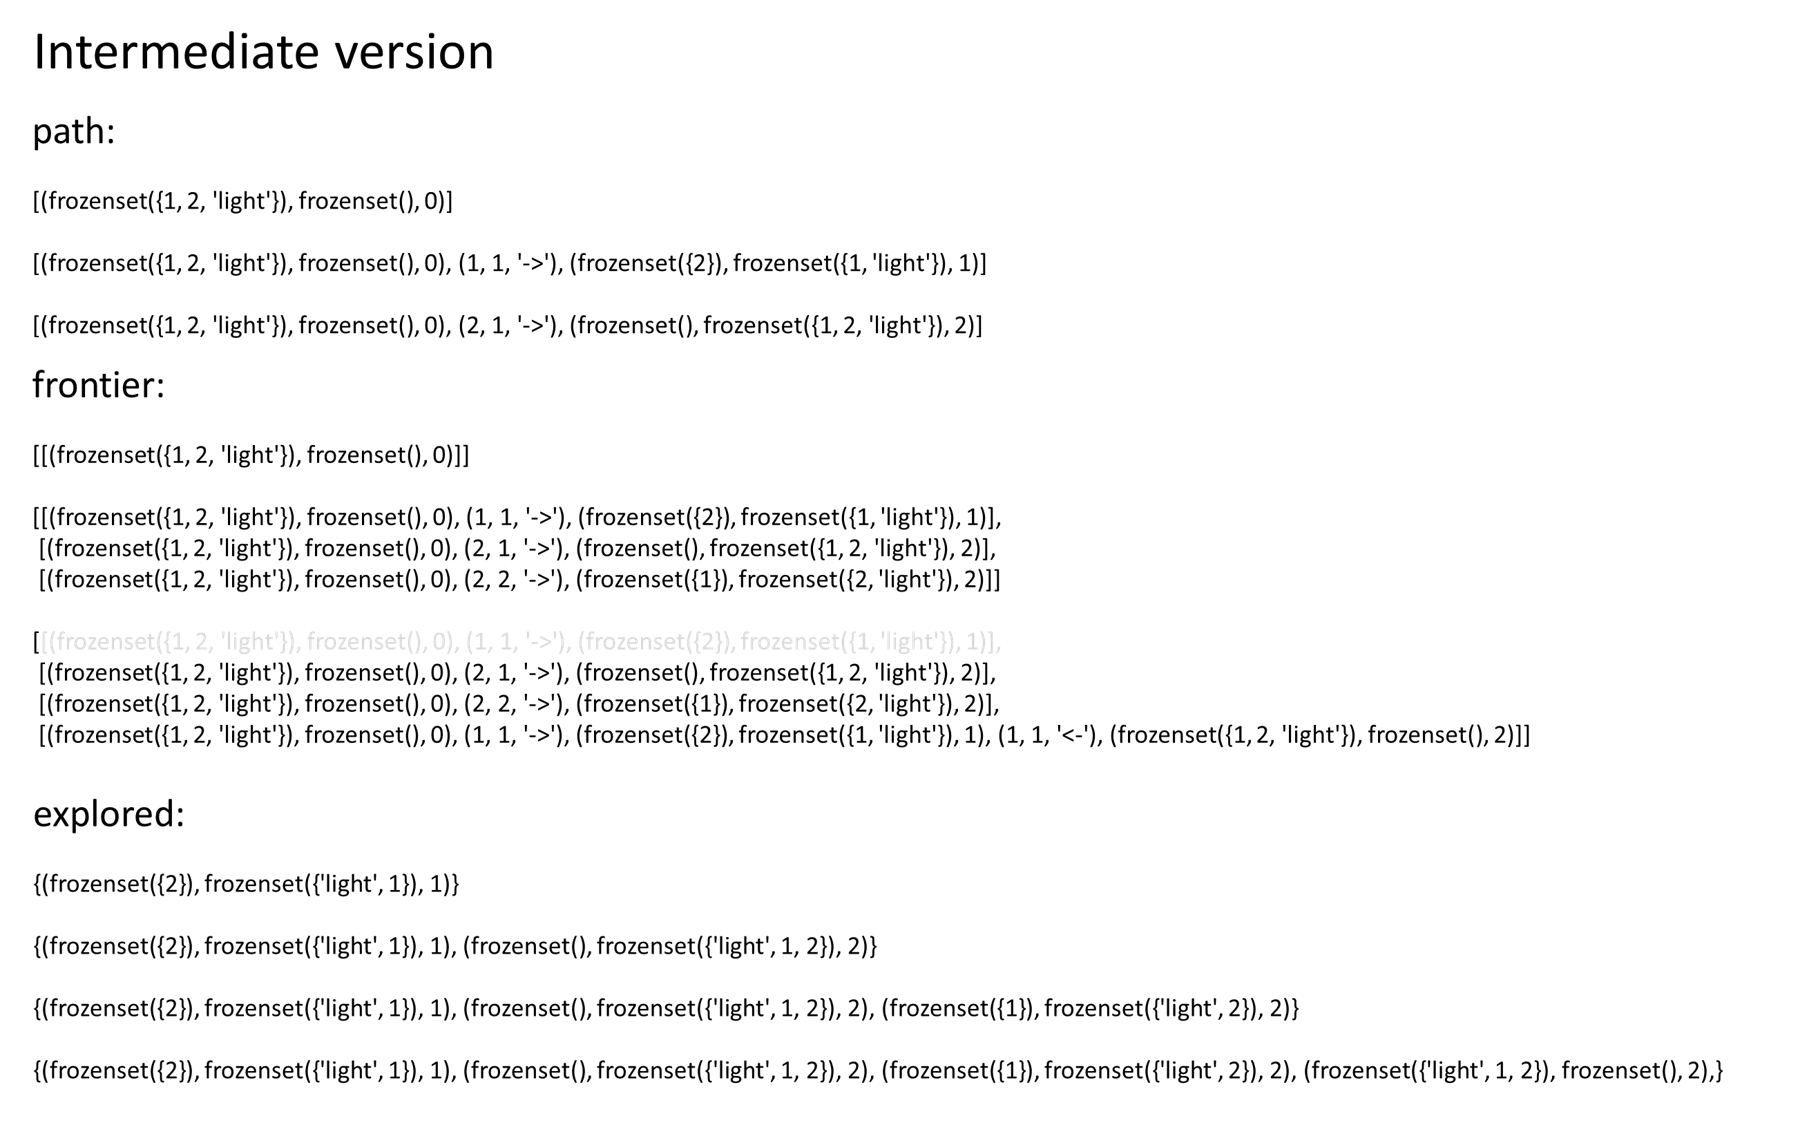

In [3]:
from IPython.display import Image

Image("Desktop\Detail_Intermediate.png")

=> intermediate version的 path  &  frontier  &  explored (frozenset((1, 2))為例)

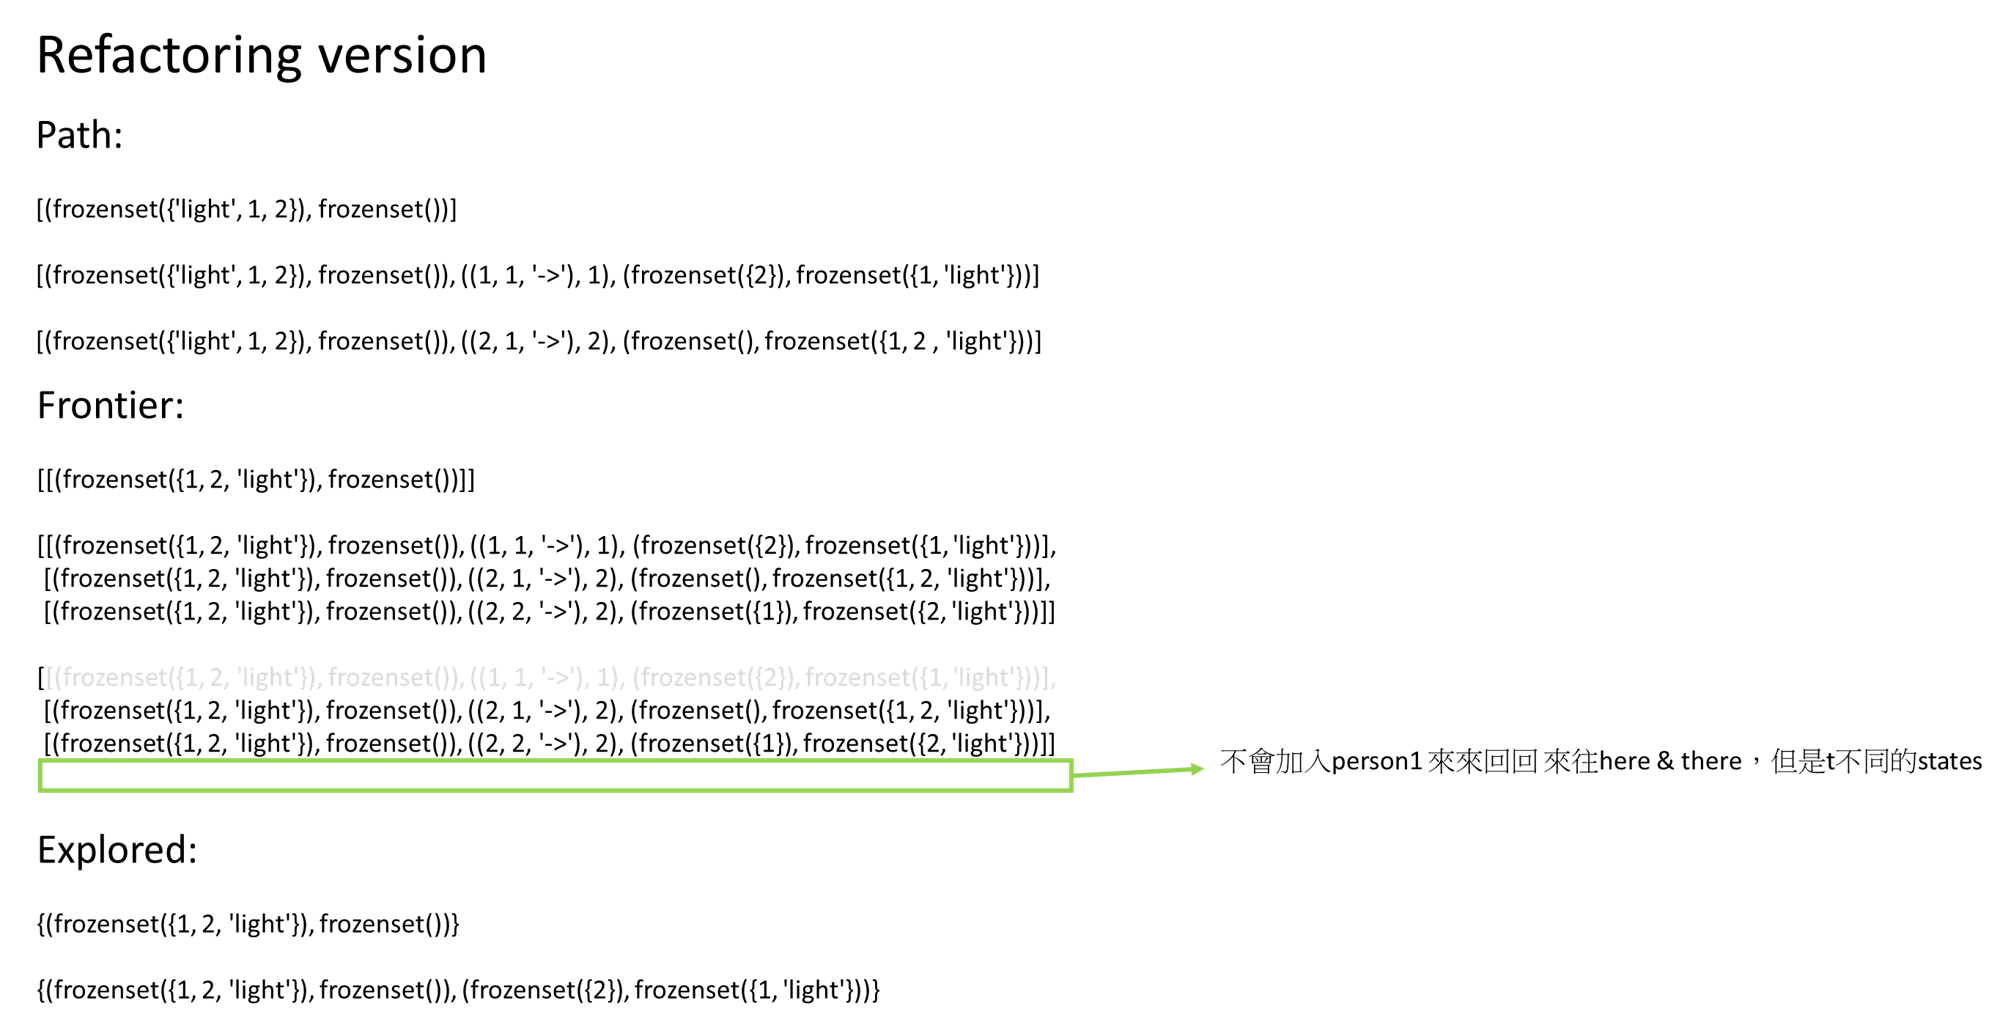

In [4]:
from IPython.display import Image

Image("Desktop\Detail_Refactoring.png")

=> refactoring version的 path  &  frontier  &  explored (frozenset((1, 2))為例)

# 4. Gerneralized version

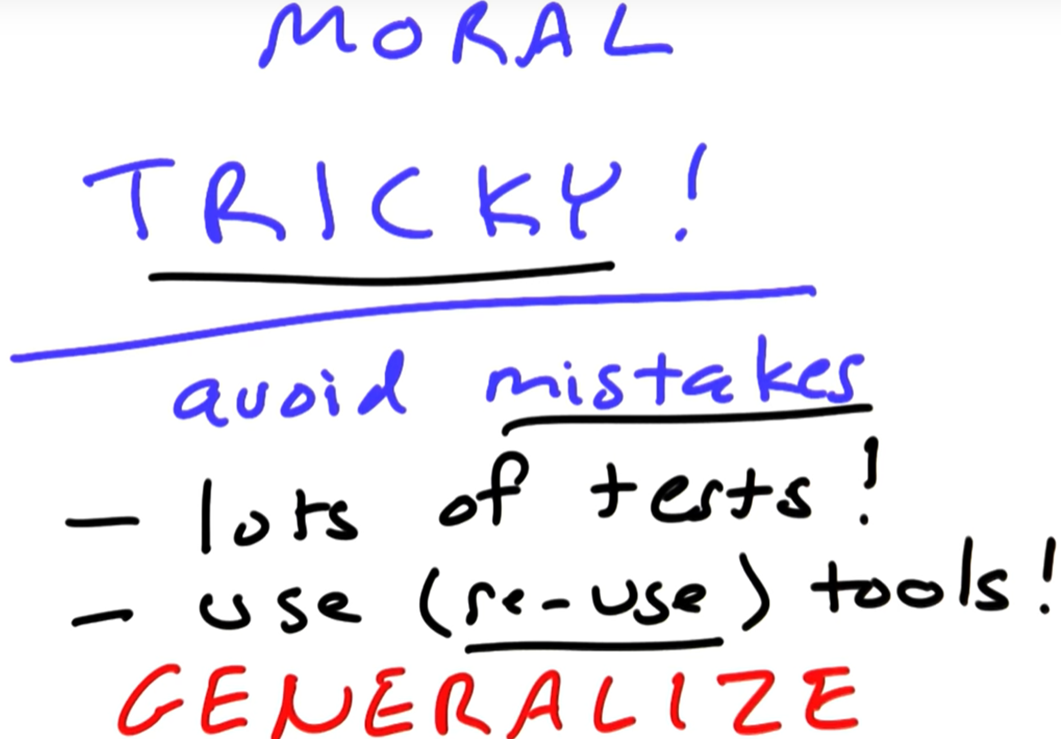

In [9]:
from IPython.display import Image

Image("Desktop\Generazization.png", width=500, height=500)


=> 此類problems較tricky，容易有bugs
=> 但是解題strategy大部分相同
=> 所以將可以共用的部分，分離出來，讓其他problems皆可直接套用
=> reduce bugs
=> 稱"Generalization"

# (1) Code

In [5]:
def bridge_problem3(here):
    """Find the fastest (least elapsed time) path to the goal in the bridge problem."""
    
    start = (frozenset(here) | frozenset(['light']), frozenset())
    
    return lowest_cost_search(start, bsuccessors2, bp_is_goal, bcost) 

def bp_is_goal(state):
    
    return not state[0]

def lowest_cost_search(start, successors, is_goal, action_cost):
    """Return the lowest cost path, starting from start state, and considering successors(state) => {state:action,...}, that 
    ends in a state for which is_goal(state) is true, where the cost of a path is the sum of action costs, which are given by 
    action_cost(action)."""
    
    explored = set() # set of states we have visited
    
    frontier = [ [start] ] # ordered list of paths we have blazed
    
    while frontier:
        
        path = frontier.pop(0)
        
        state1 = final_state(path)
        
        if is_goal(state1):  
            
            return path
        
        explored.add(state1)
        
        pcost = path_cost(path)
        
        for (state, action) in successors(state1).items():
            
            if state not in explored:
                
                total_cost = pcost + action_cost(action)
                
                path2 = path + [(action, total_cost), state]
                
                add_to_frontier(frontier, path2)
                
    return Fail

def final_state(path): 
    
    return path[-1]

def path_cost(path):
    "The total cost of a path (which is stored in a tuple with the final action)."
    
    if len(path) < 3:
        
        return 0
    
    else:
        
        action, total_cost = path[-2]
        
        return total_cost
    
def add_to_frontier(frontier, path):
    "Add path to frontier, replacing costlier path if there is one."

    old = None
    
    for i,p in enumerate(frontier):
        
        if final_state(p) == final_state(path):
            
            old = i
            
            break
            
    if old is not None and path_cost(frontier[old]) < path_cost(path):
        
        return # Old path was better; do nothing
    
    elif old is not None:
        
        del frontier[old] # Old path was worse; delete it
        
    ## Now add the new path and re-sort
    frontier.append(path)
    frontier.sort(key=path_cost)

def bsuccessors2(state):
    """Return a dict of {state:action} pairs. A state is a (here, there) tuple, where here and there are frozensets of people 
    (indicated by their times) and/or the light."""
    
    here, there = state
    
    if 'light' in here:
        
        return dict(((here  - frozenset([a, b, 'light']),
                      there | frozenset([a, b, 'light'])),
                     (a, b, '->'))
                    for a in here if a is not 'light'
                    for b in here if b is not 'light')
    
    else:
        
        return dict(((here  | frozenset([a, b, 'light']),
                      there - frozenset([a, b, 'light'])),
                     (a, b, '<-'))
                    for a in there if a is not 'light'
                    for b in there if b is not 'light')

def bcost(action):
    "Returns the cost (a number) of an action in the bridge problem."
    # An action is an (a, b, arrow) tuple; a and b are times; arrow is a string
    
    a, b, arrow = action
    
    return max(a, b)

print (bridge_problem3([1,2,5,10]))


[(frozenset({1, 2, 5, 10, 'light'}), frozenset()), ((2, 1, '->'), 2), (frozenset({10, 5}), frozenset({1, 2, 'light'})), ((2, 2, '<-'), 4), (frozenset({'light', 10, 2, 5}), frozenset({1})), ((5, 10, '->'), 14), (frozenset({2}), frozenset({1, 10, 'light', 5})), ((1, 1, '<-'), 15), (frozenset({1, 2, 'light'}), frozenset({10, 5})), ((2, 1, '->'), 17), (frozenset(), frozenset({1, 2, 5, 10, 'light'}))]


# (2) Descriptoon => 以frozenset((1, 2))為例

In [ ]:
(1) 絕大部分都和refactoring version一樣

(2) 相同:
    
    (i) successors都是bsuccessors2

    (ii) action_cost都是bcost

    (iii) final_state都相同

    (iv) path_cost都相同

    (v) add_to_frontier都相同
    
    (vi) elapsed_time都相同

(3) 不同:
    
    (i) Gerneralized version的bridge_problem3是直接鍵入start state，然後return lowest_cost_search => generalization
    
    (ii) lowest_cost_search就是refactoring的bridge_problem2的部分內容，只是分離出來 => generalization
    
    (iii) Gerneralized version多了bp_is_goal，因為lowest_cost_search需要鍵入is_goal，is_goal就是目標
    
        (a) bp_is_goal(state1)是return (not state1[0])
    
        => Ex: state1 == (frozenset({'light', 1, 2}), frozenset())
        => 代入bp_is_goal
        => 因為state1[0] == frozenset({'light', 1, 2})是 True
        => 代表here區還沒有清空
        => bp_is_goal return False
        => 代表還不是目標(答案)
        => 所以不會進入if statement
        => 繼續run
        
        (b) refactoring的bridge_problem2中的if statement是 if not here1
        => here1也就是path[-1][0]，代表here區的狀態
    
    => 上述兩方法，意思一樣，只是Gerneralized version將here區的狀態generalization => 將目標generalization
    